# Install Required  Libraries:

In [ ]:
#pip install numpy
#pip install pandas
#pip install opencv-python
#pip install tensorflow
#pip install matplotlib
#pip install sklearn

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2

In [10]:
file_path = "C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset"

In [11]:
tumor_images = os.listdir(os.path.join(file_path, 'yes'))
non_tumor_images = os.listdir(os.path.join(file_path, 'no'))

In [7]:
def plot_images(image_list, title):
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        img = cv2.imread(os.path.join(file_path, title, image_list[i]))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert colors from BGR to RGB for correct display
    plt.suptitle(f"Brain images with {title}", fontsize=20)
    plt.show()

In [12]:
def plot_images(image_list, title):
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        img_path = os.path.join(file_path, title, image_list[i])
        try:
            img = cv2.imread(img_path)
            if img is not None:
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            else:
                print(f"Error: Unable to read image at {img_path}")
        except Exception as e:
            print(f"Error: {e} - {img_path}")
    plt.suptitle(f"Brain images with {title}", fontsize=20)
    plt.show()




Error: Unable to read image at C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset\Tumor\Y1.jpg
Error: Unable to read image at C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset\Tumor\Y10.jpg
Error: Unable to read image at C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset\Tumor\Y100.JPG
Error: Unable to read image at C:/Users/thiru/Tensorflow_ML_DL/Brain Tumor Major Project/brain_tumor_dataset\Tumor\Y101.jpg


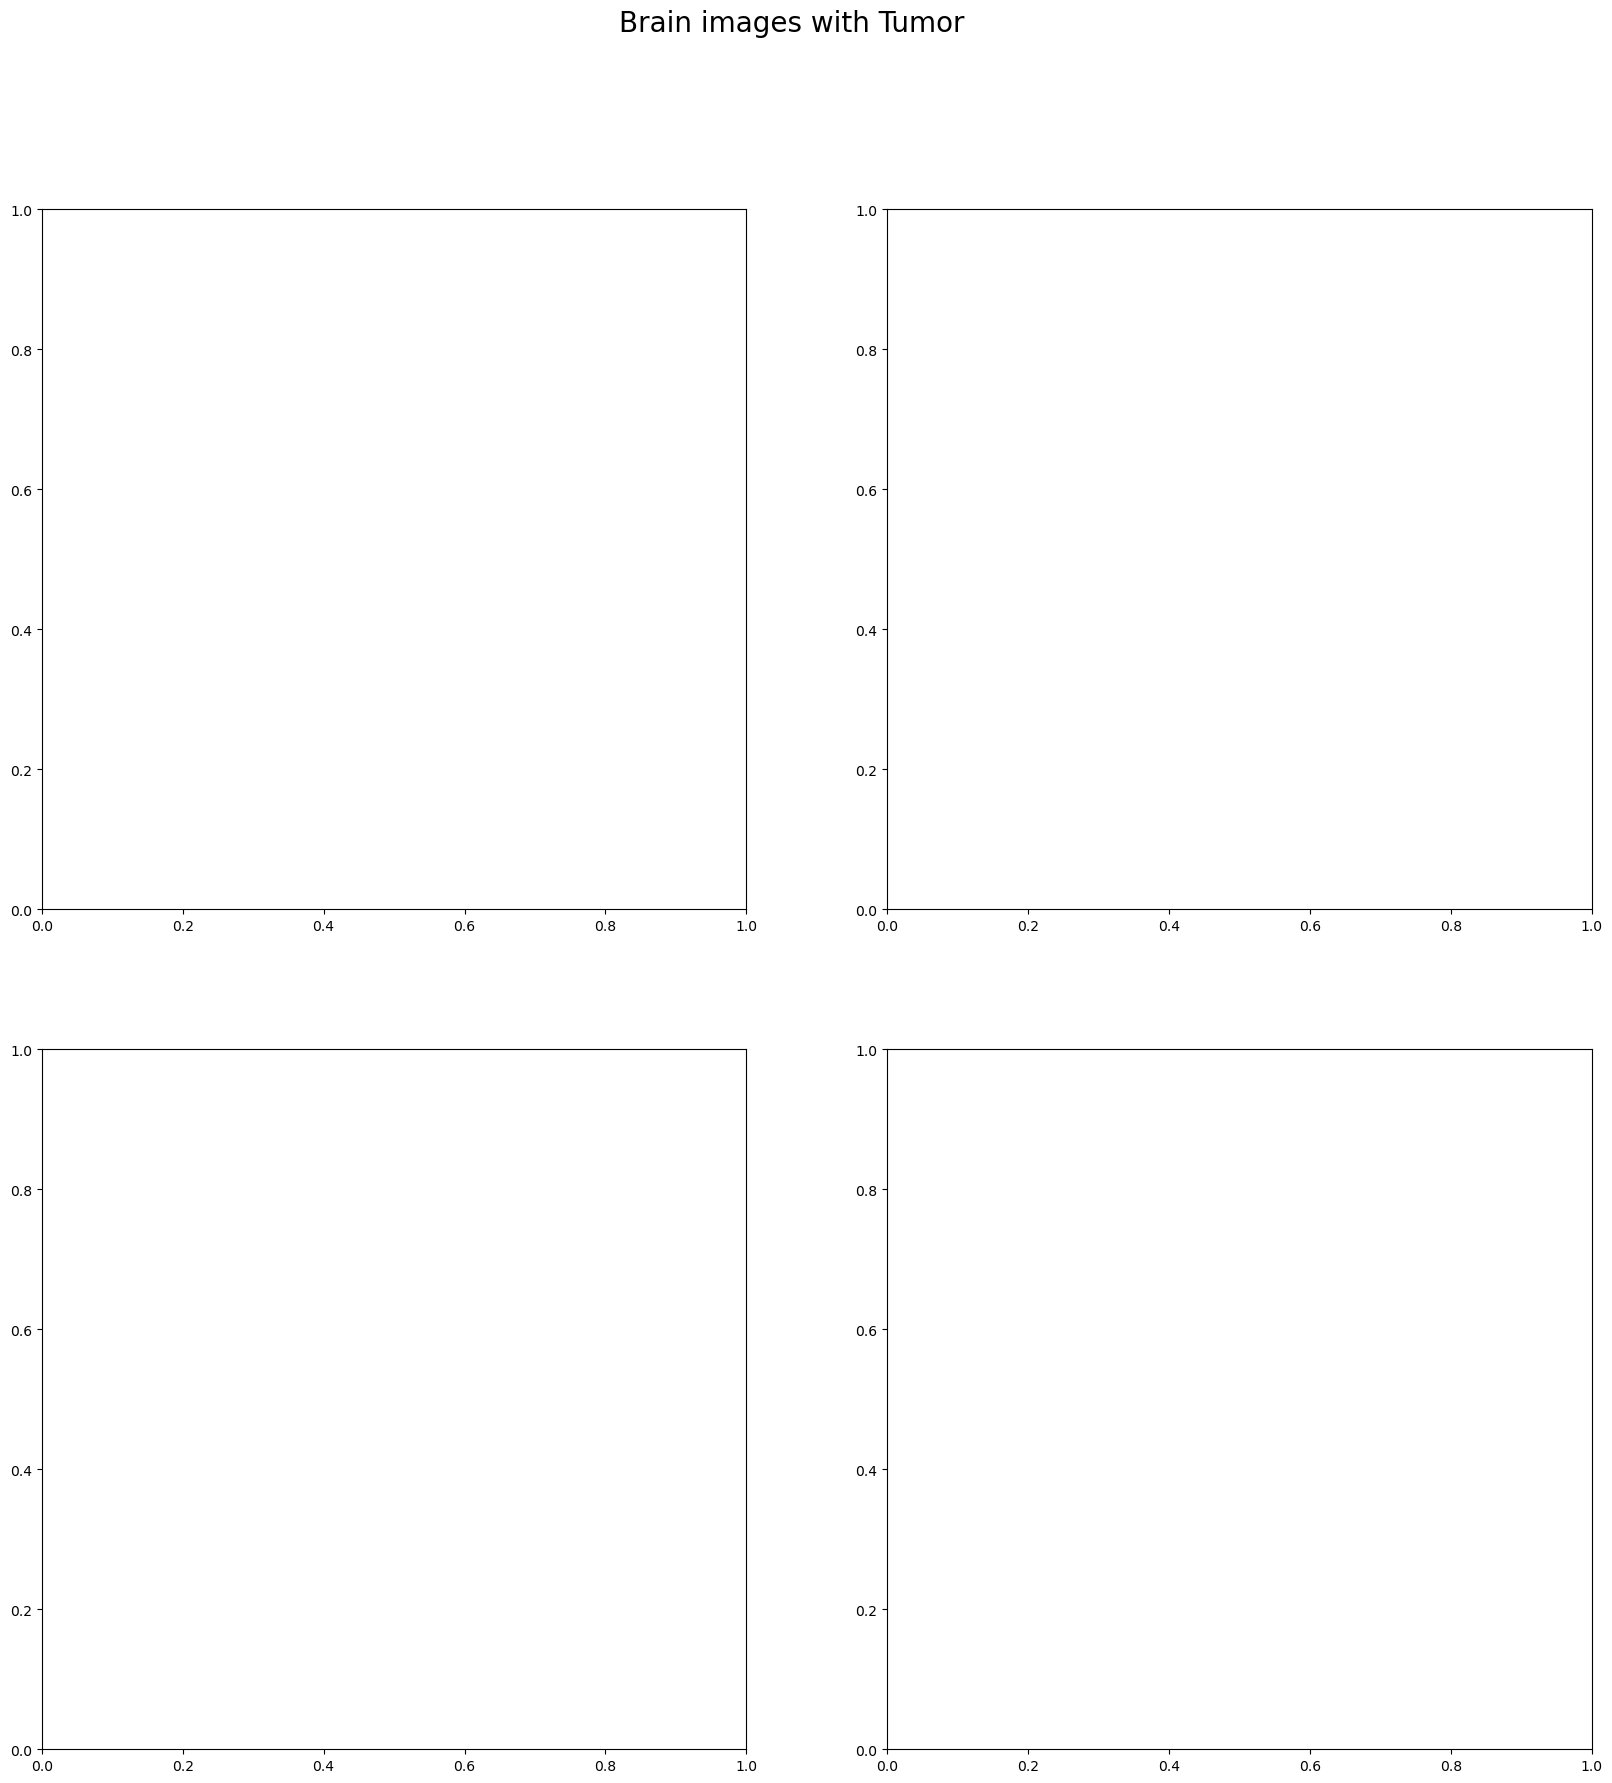

In [13]:
plot_images(tumor_images, 'Tumor')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


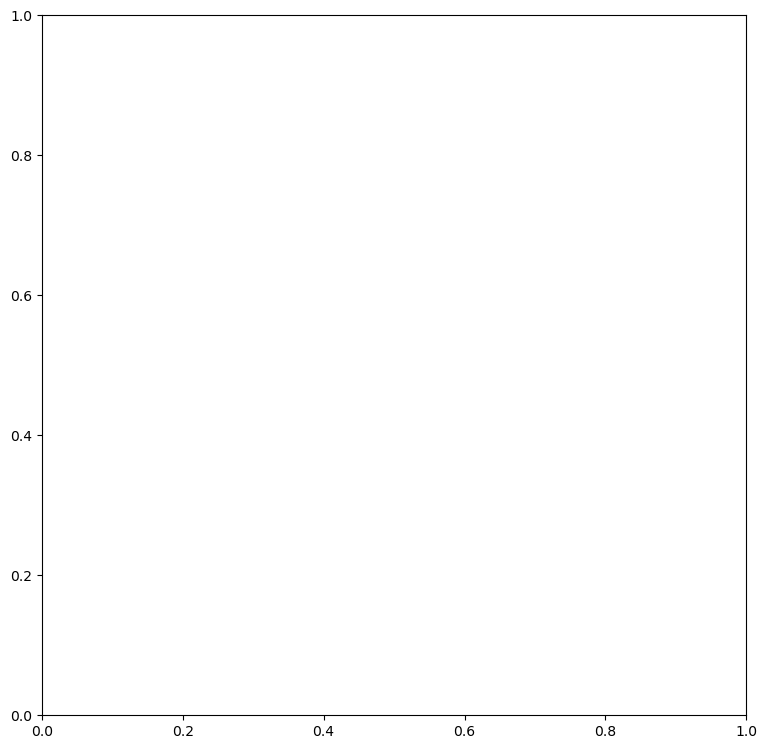

In [8]:
plot_images(tumor_images, 'Tumor')